In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
data = pd.read_csv("/Users/derekolson/DerekOlson/CS6017/homework4/spatialDatastructuresStarterCode/output.csv")
data['n'] = data['n']*10

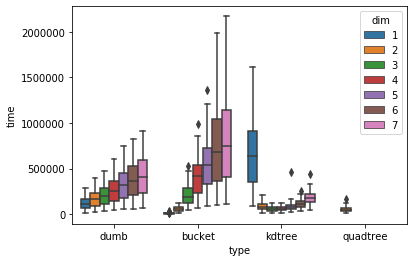

In [3]:
#Plot all the data by Dimension
sns.boxplot(x='type', y='time', hue='dim', data=data)

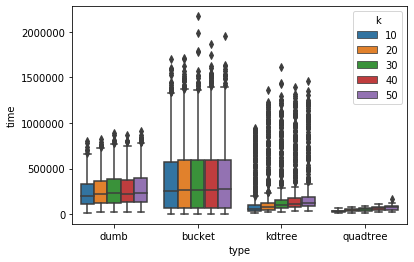

In [4]:
#Plot all the data by K
sns.boxplot(x='type', y='time', hue='k', data=data)

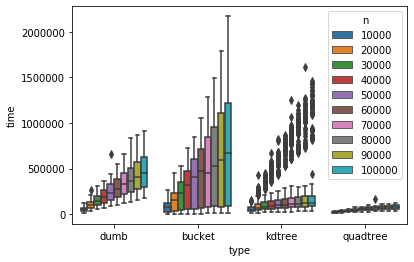

In [5]:
#Plot all the data by N
sns.boxplot(x='type', y='time', hue='n', data=data)

In [6]:
#Here we evaluate structures with 2 dimensions in order to compare quadtree against other structures
df2 = data[data['dim'] == 2]

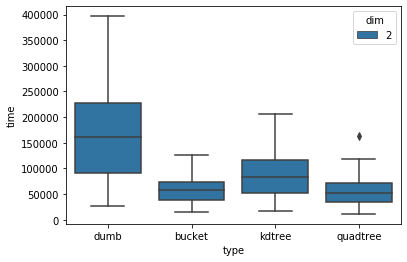

In [7]:
sns.boxplot(x='type', y='time', hue='dim', data=df2)
#bucket appears to perform the best with 2 dimensions.

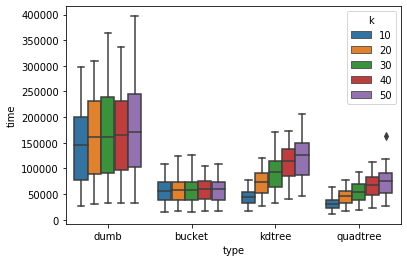

In [8]:
sns.boxplot(x='type', y='time', hue='k', data=df2)
#quadtree and kdtree appear to be the most affected by a changing value of K.

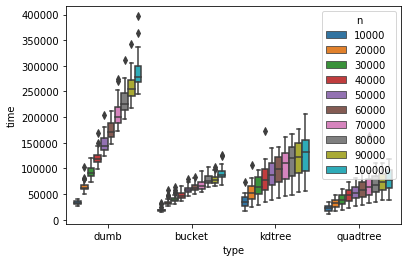

In [9]:
sns.boxplot(x='type', y='time', hue='n', data=df2)
#Time increases with an increasing N for all structures. Time increases most rapidly for dumbknn.

In [10]:
#Ploting part of my data to make sense of it
#subset the dimension data where there are more than two dimensions
#does dimension have any impact on time?
df = data[data['dim'] > 2]

Text(0.5, 1.0, 'Dimension')

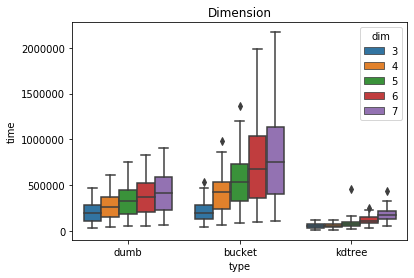

In [11]:
sns.boxplot(x='type', y='time', hue='dim', data=df).set_title('Dimension')
#It appears that time increases for each structure as the number of dimensions increases.
#WHICH INCREASES THE MOST 

Text(0.5, 1.0, 'N')

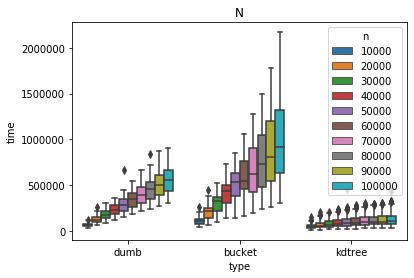

In [12]:
sns.boxplot(x='type', y='time', hue='n', data=df).set_title('N')
#Intuitively time also increases as the number of training points increases for all structures.
#WHICH INCREASES THE MOST 

Text(0.5, 1.0, 'K')

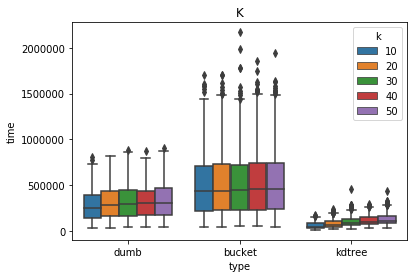

In [13]:
sns.boxplot(x='type', y='time', hue='k', data=df).set_title('K')
#The value of K seems to impact kdtree the most while both dumbknn and bucket are relatively flat in 
#response to an increasing K. 

3
4
5
6
7


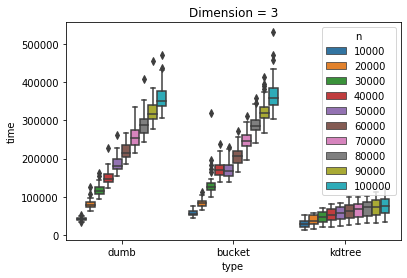

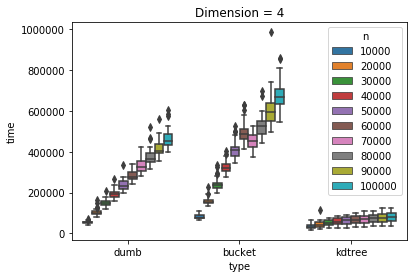

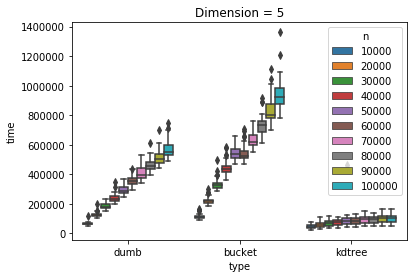

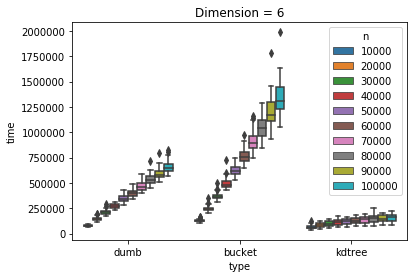

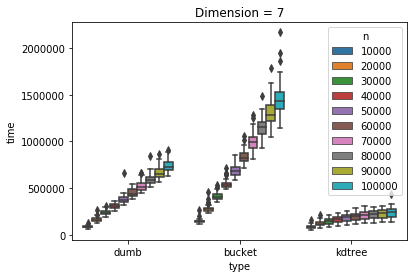

In [25]:
#In the plots above it is impossible to isolate the effect of an individual variable.
#Below we plot each interval of N, K, and D inorder to better understand the effects of each variable on time.
for i in range(3,8,1):
    dim = df[df['dim'] == i]
    plt.figure()
    sns.boxplot(x='type', y='time', hue='n', data=dim).set_title('Dimension = '+str(i))

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000


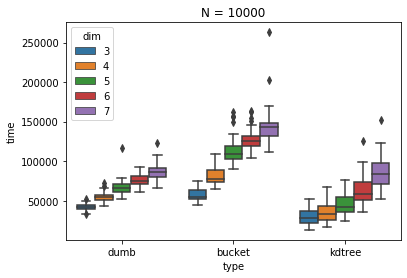

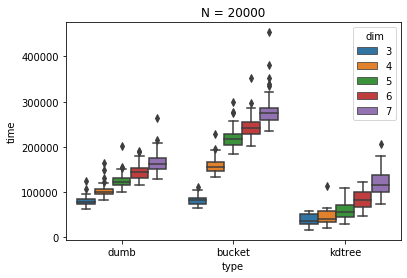

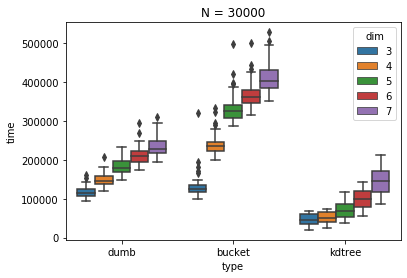

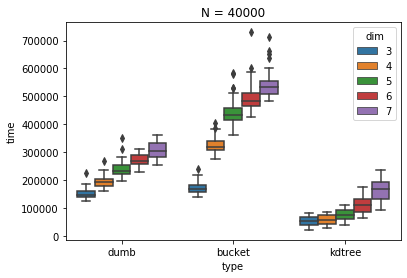

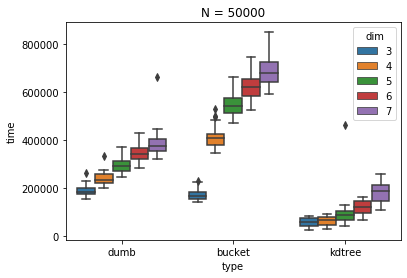

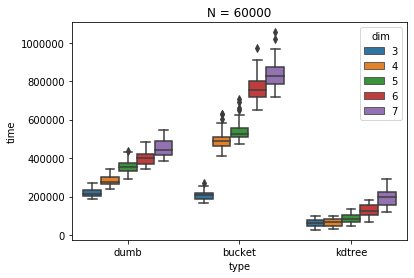

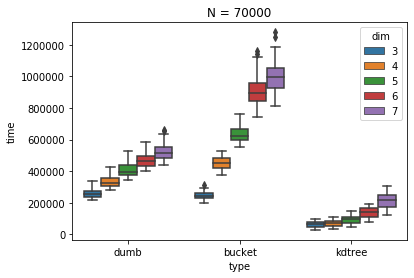

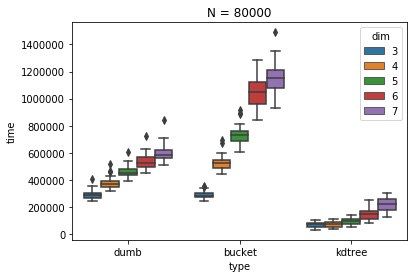

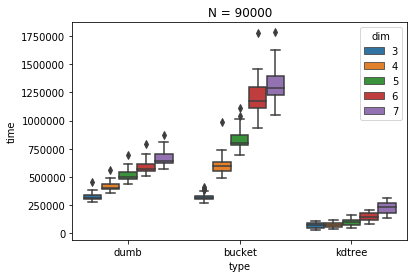

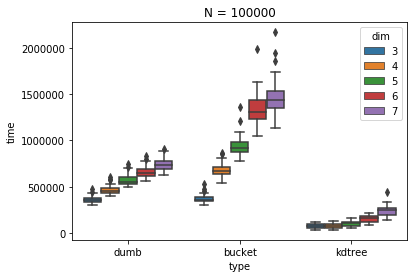

In [26]:
#Does N increase time?
#subset the training data
for i in range(10000,110000,10000):
    n = df[df['n'] == i]
    plt.figure()
    sns.boxplot(x='type', y='time', hue='dim', data=n).set_title('N = '+str(i))

10
20
30
40
50


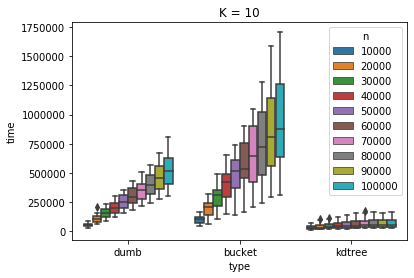

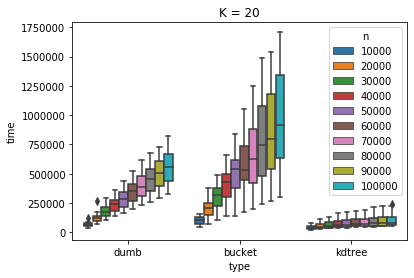

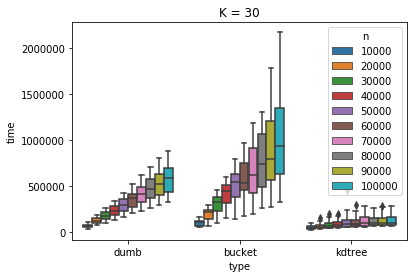

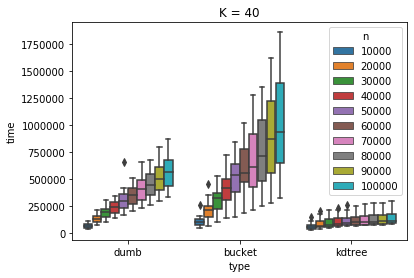

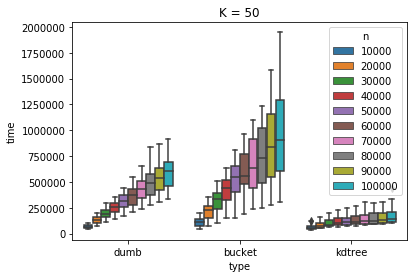

In [27]:
#Does K increase time?
#subset the k data
for i in range(10,60,10):
    k = df[df['k'] == i]
    plt.figure()
    sns.boxplot(x='type', y='time', hue='n', data=k).set_title('K = '+str(i))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   time   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     4895.
Date:                Mon, 22 Jun 2020   Prob (F-statistic):               0.00
Time:                        12:55:31   Log-Likelihood:            -1.1613e+05
No. Observations:                8698   AIC:                         2.323e+05
Df Residuals:                    8692   BIC:                         2.323e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           -3e+05   5694.546    -52.684      0.000   -3.11e+05   -2.89e+05
dim          7.761e+04   1153.398     67.287      0.000    7.53e+04    7.99e+04
n               5.2868      0.057     93.082      0.000       5.175       5.398
k            1115.7781    115.675      9.646      0.000     889.029    1342.528
type_bucket  1.131e+05   2968.266     38.097      0.000    1.07e+05    1.19e+05
type_dumb   -9.883e+04   2969.402    -33.284      0.000   -1.05e+05    -9.3e+04
type_kdtree -3.143e+05   3027.865   -103.789      0.000    -3.2e+05   -3.08e+05
==============================================================================
Omnibus:                     2222.147   Durbin-Watson:                   0.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8199.949
Skew:                           1.243   Prob(JB):                         0.00
Kurtosis:                       7.055   Cond. No.                     3.09e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.52e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

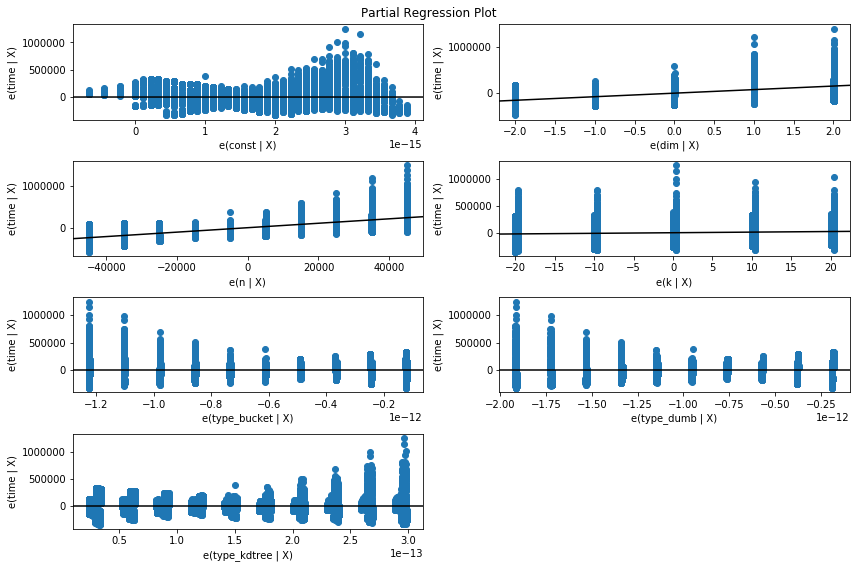

In [17]:
#First two dimensions removed to account for non-linear trends with kdtree
dummies = pd.get_dummies(df)
x = dummies.drop('time', axis=1)
x = sm.add_constant(x)
y=df['time']
model = sm.OLS(y,x).fit()
display(model.summary())
fig= plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(model, fig=fig)

                            OLS Regression Results                            
Dep. Variable:                   time   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     19.20
Date:                Mon, 22 Jun 2020   Prob (F-statistic):           1.19e-05
Time:                        12:56:08   Log-Likelihood:            -1.2194e+05
No. Observations:                8698   AIC:                         2.439e+05
Df Residuals:                    8696   BIC:                         2.439e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.874e+05   7456.124     38.545      0.0

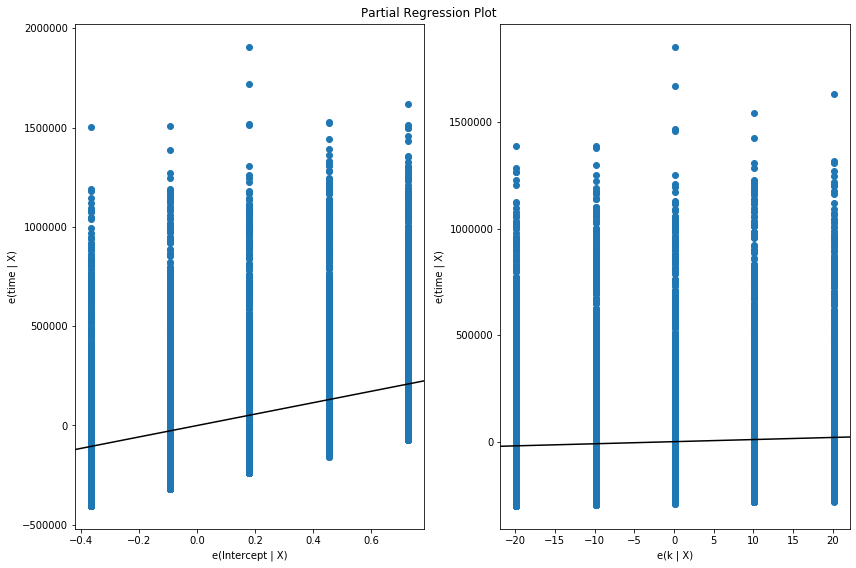

In [18]:
model1 = smf.ols(formula='time ~ k', data=df)
res1 = model1.fit()
print(res1.summary())
fig1= plt.figure(figsize=(12,8))
fig1 = sm.graphics.plot_partregress_grid(res1, fig=fig1)

                            OLS Regression Results                            
Dep. Variable:                   time   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     1371.
Date:                Mon, 22 Jun 2020   Prob (F-statistic):          6.98e-279
Time:                        12:56:16   Log-Likelihood:            -1.2131e+05
No. Observations:                8698   AIC:                         2.426e+05
Df Residuals:                    8696   BIC:                         2.426e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7.067e+04   1.09e+04     -6.497      0.0

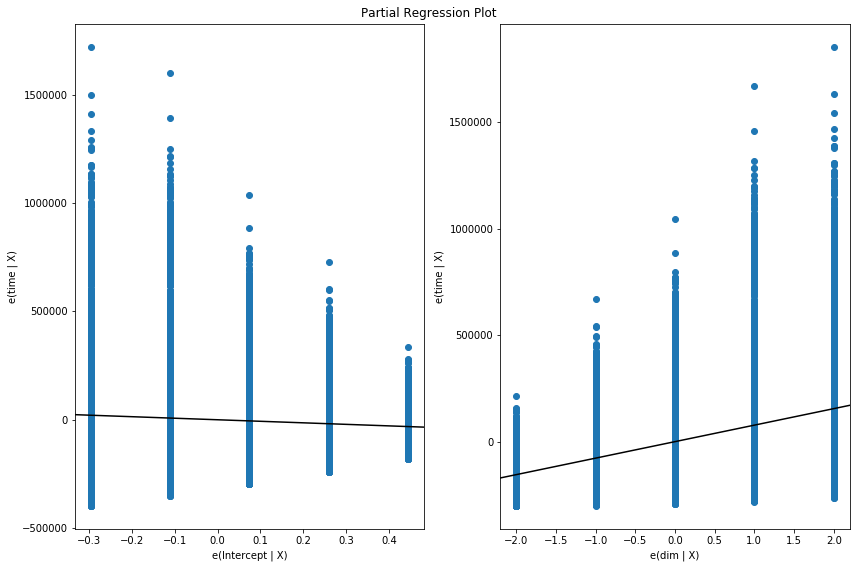

In [19]:
model2 = smf.ols(formula='time ~ dim', data=df)
res2 = model2.fit()
print(res2.summary())
fig2= plt.figure(figsize=(12,8))
fig2 = sm.graphics.plot_partregress_grid(res2, fig=fig2)

                            OLS Regression Results                            
Dep. Variable:                   time   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     3068.
Date:                Mon, 22 Jun 2020   Prob (F-statistic):               0.00
Time:                        12:56:17   Log-Likelihood:            -1.2064e+05
No. Observations:                8698   AIC:                         2.413e+05
Df Residuals:                    8696   BIC:                         2.413e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.646e+04   5916.481      4.472      0.0

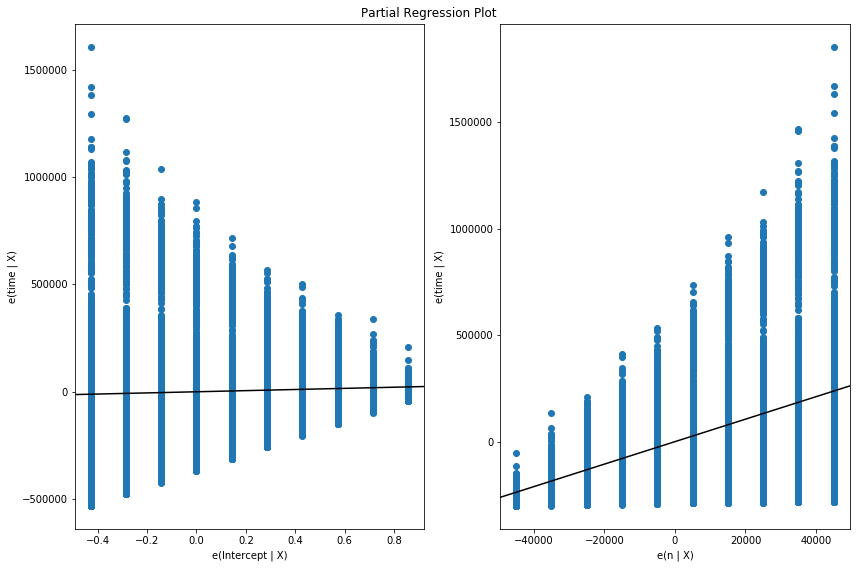

In [20]:
model3 = smf.ols(formula='time ~ n', data=df)
res3 = model3.fit()
print(res3.summary())
fig3= plt.figure(figsize=(12,8))
fig3 = sm.graphics.plot_partregress_grid(res3, fig=fig3)

In [ ]:
# I was surprised to see that dumbknn outperformed bucketknn at larger sizes of N. I was also surprised that kdtree
# did so poorly in 1 dimension. Overall, increases in time related to K and N were expected for all structures. 
# Lastly, it was expected that the bucket structure would not increase substantially with increaing dimensions 
# and this was true. 